## Exploratory Data Analysis (EDA)
EDA is crucial for identifying relationships between Brent oil prices and influencing factors:

- **Trend Analysis**: Observe long-term trends in oil prices relative to economic growth or exchange rates.
- **Correlation Analysis**: Quantify the relationships between Brent prices and other indicators (e.g., using correlation matrices).
- **Seasonality Detection**: Detect seasonal patterns in prices that may align with economic cycles or regulatory changes.


In [1]:
import os
import sys

sys.path.insert(0,os.path.dirname(os.getcwd()))

In [2]:
from scripts.data_preprocessing import DataPreprocessor
from scripts.feature_engineering import FeatureEngineer
from scripts.TimeSeries import TimeSeriesVisualizer
preprocessor = DataPreprocessor("../Data/Copy of BrentOilPrices (1).csv")
dateData=preprocessor._load_data()
preprocessed_data = preprocessor.preprocess()

d:\week10\scripts\data_preprocessing.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(self.file_path, parse_dates=['Date'])


Data loaded successfully.


d:\week10\scripts\data_preprocessing.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(self.file_path, parse_dates=['Date'])


Data loaded successfully.
Missing values handled.
Outliers removed.
Data preprocessing complete.


d:\week10\scripts\data_preprocessing.py:43: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  self.data = self.data[(np.abs(self.data - self.data.mean()) / self.data.std()) < 3]


In [3]:
dateData.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [4]:
Dataset=preprocessed_data

In [5]:
Dataset

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [6]:
preprocessed_data.columns

Index(['Date', 'Price'], dtype='object')

In [7]:
Dataset["Price"]

0       18.63
1       18.45
2       18.55
3       18.60
4       18.63
        ...  
9006    96.85
9007    93.05
9008    94.25
9009    96.37
9010    93.59
Name: Price, Length: 9011, dtype: float64

In [8]:
timeSeries=TimeSeriesVisualizer()

In [9]:
Dataset

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [10]:
Dataset

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


In [11]:
dataPreparing=timeSeries._prepare_data(dateData)

In [12]:
dataPreparing

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


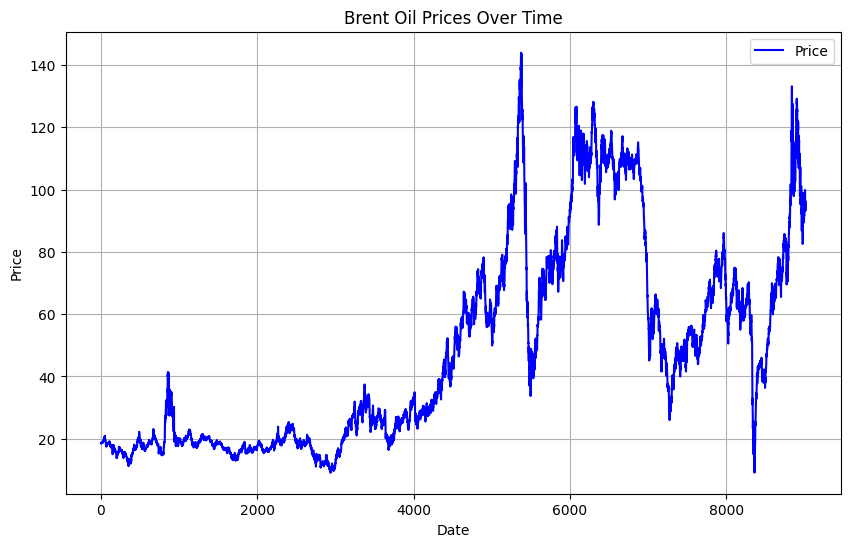

In [13]:
timeSeries.plot_time_series(dataPreparing)

d:\week10\scripts\TimeSeries.py:132: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


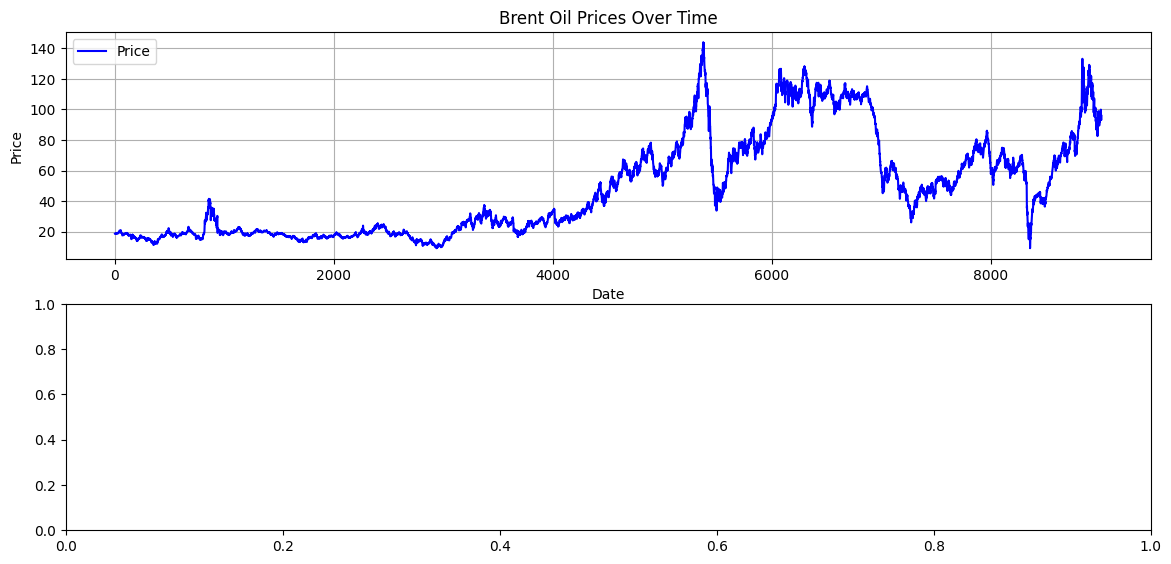

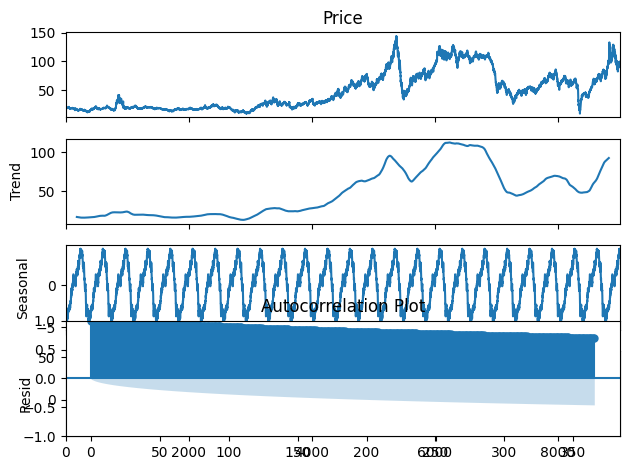

In [14]:
timeSeries.visualize_time_series(dataPreparing)